# Data Analysis For The London Bikeshares
* This analysis is performed on the London bike Sharing data for the years 2015, 2016, 2017. The purpose of this analysis is to determine the depencency and relationships that exist between the number of bike shares and the other variables within the dataset.

### Reading the CSV data from file to memeory and merging both files into a single dataframe 

In [1]:
# Setting working directory
import os
os.chdir("D:\\DATA SCI\\P4DS\\P4DS  Material")

os.getcwd()

'D:\\DATA SCI\\P4DS\\P4DS  Material'

In [2]:
# Importing pandas Library
import pandas as pd

# Importing Numpy Library
import numpy as np

# Importing stats from Scipy Library
from scipy import stats

# Importime DateTime
import datetime

# Importing Matplotlib Library
import matplotlib.pyplot as plt
%matplotlib inline

# Importing seaborn Library
import seaborn as sns

# Reading file into memory
bikeshr1 = pd.read_csv("D:\\DATA SCI\\P4DS\\P4DS  Material\\resit_task2a.csv")
bikeshr2 = pd.read_csv("D:\\DATA SCI\\P4DS\\P4DS  Material\\resit_task2b.csv")

# Merging the twon dataset into a single dataframe
bikeshr = pd.merge(bikeshr1, bikeshr2, on = "timestamp")

# Displaying first 4 records in the dataframe
bikeshr.head()



,timestamp,new_bike_shares,temperature,feels_like_temp,humidity,wind_speed,is_weekend,season_code
0,04/01/2015 00:00,182,3.0,2.0,93.0,6.0,1,3
1,04/01/2015 01:00,138,3.0,2.5,93.0,5.0,1,3
2,04/01/2015 02:00,134,2.5,2.5,96.5,0.0,1,3
3,04/01/2015 03:00,72,2.0,2.0,100.0,0.0,1,3
4,04/01/2015 04:00,47,2.0,0.0,93.0,6.5,1,3


### Cleaning the merged data

In [3]:
# Getting an overview of the dataframe
bikeshr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17414 entries, 0 to 17413
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        17414 non-null  object 
 1   new_bike_shares  17414 non-null  int64  
 2   temperature      17414 non-null  float64
 3   feels_like_temp  17414 non-null  float64
 4   humidity         17414 non-null  float64
 5   wind_speed       17414 non-null  float64
 6   is_weekend       17414 non-null  int64  
 7   season_code      17414 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 1.2+ MB


In [4]:
bikeshr.isnull().value_counts()

timestamp  new_bike_shares  temperature  feels_like_temp  humidity  wind_speed  is_weekend  season_code
False      False            False        False            False     False       False       False          17414
dtype: int64

In [5]:
# Converting the timestamp series into pandas datetime format 
bikeshr["timestamp"] = pd.to_datetime(bikeshr.timestamp)

# Removing rows with bikeshare less than 20 based on requirement
bikeshr_blw_20 = bikeshr[bikeshr["new_bike_shares"] < 20].index
bikeshr_clean = bikeshr.drop(bikeshr_blw_20)
(bikeshr_clean["new_bike_shares"] < 20).value_counts()

False    17373
Name: new_bike_shares, dtype: int64

In [6]:
# Perfoming a split on the time stamp series into year, month, day, hour and day of the week
bikeshr_clean["year"] = bikeshr_clean["timestamp"].dt.year
bikeshr_clean["month"] = bikeshr_clean["timestamp"].dt.month
bikeshr_clean["day"] = bikeshr_clean["timestamp"].dt.day
bikeshr_clean["hour"] = bikeshr_clean["timestamp"].dt.hour
bikeshr_clean["day_of_the_week"] = bikeshr_clean["timestamp"].dt.day_name() 

In [7]:
bikeshr_clean

,timestamp,new_bike_shares,temperature,feels_like_temp,humidity,wind_speed,is_weekend,season_code,year,month,day,hour,day_of_the_week
0,2015-04-01 00:00:00,182,3.0,2.0,93.0,6.0,1,3,2015,4,1,0,Wednesday
1,2015-04-01 01:00:00,138,3.0,2.5,93.0,5.0,1,3,2015,4,1,1,Wednesday
2,2015-04-01 02:00:00,134,2.5,2.5,96.5,0.0,1,3,2015,4,1,2,Wednesday
3,2015-04-01 03:00:00,72,2.0,2.0,100.0,0.0,1,3,2015,4,1,3,Wednesday
4,2015-04-01 04:00:00,47,2.0,0.0,93.0,6.5,1,3,2015,4,1,4,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-03-01 19:00:00,1042,5.0,1.0,81.0,19.0,0,3,2017,3,1,19,Wednesday
17410,2017-03-01 20:00:00,541,5.0,1.0,81.0,21.0,0,3,2017,3,1,20,Wednesday
17411,2017-03-01 21:00:00,337,5.5,1.5,78.5,24.0,0,3,2017,3,1,21,Wednesday
17412,2017-03-01 22:00:00,224,5.5,1.5,76.0,23.0,0,3,2017,3,1,22,Wednesday


In [8]:
# Mapping days of the week to weekdays and weekends

wkday_wkend_mapn = {
    "Monday": "Weekday",
    "Tuesday": "Weekday",
    "Wednesday": "Weekday",
    "Thursday": "Weekday",
    "Friday": "Weekday",
    "Saturday": "Weekend",
    "Sunday": "Weekend"
}

bikeshr_clean["time_of_week"] = bikeshr_clean["day_of_the_week"].map(arg = wkday_wkend_mapn)
bikeshr_clean.head()

,timestamp,new_bike_shares,temperature,feels_like_temp,humidity,wind_speed,is_weekend,season_code,year,month,day,hour,day_of_the_week,time_of_week
0,2015-04-01 00:00:00,182,3.0,2.0,93.0,6.0,1,3,2015,4,1,0,Wednesday,Weekday
1,2015-04-01 01:00:00,138,3.0,2.5,93.0,5.0,1,3,2015,4,1,1,Wednesday,Weekday
2,2015-04-01 02:00:00,134,2.5,2.5,96.5,0.0,1,3,2015,4,1,2,Wednesday,Weekday
3,2015-04-01 03:00:00,72,2.0,2.0,100.0,0.0,1,3,2015,4,1,3,Wednesday,Weekday
4,2015-04-01 04:00:00,47,2.0,0.0,93.0,6.5,1,3,2015,4,1,4,Wednesday,Weekday


### Investigating the distribution of bike shares by time of day

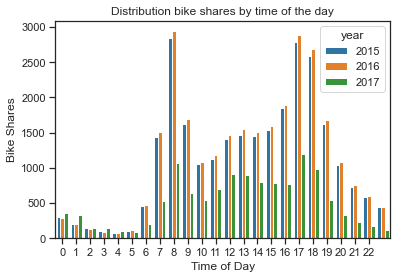

In [9]:
# Set the theme 
sns.set_theme(style = "ticks")

# Plotting New Bike Shares against Hour
hourly_bikeshr = sns.barplot(data = bikeshr_clean, x ="hour", y = "new_bike_shares",hue = "year", palette = "tab10", ci = None)
hourly_bikeshr.set(xticks = np.arange(0,23,1))

# Set the figure size
sns.set(rc ={"figure.figsize":(15,10)})

# Set Axis labels 
hourly_bikeshr.set(xlabel = "Time of Day", ylabel = "Bike Shares", title = "Distribution bike shares by time of the day")

plt.show()

The bar graph shows the bike shares distribution through out the day in intervals of one hour. From the visaulization it can be observred that in the years 2015, 2016, and 2017 the bike shares peak at 08:00Hrs and are at its lowest at 04:00Hrs. For all the three years, bike shares start rising at 06:00Hrs, and reach its peak at 08:00Hrs and drops to an avreage bike share of approximatly 1350 bike share/hr. At about 15:00Hrs the bike shares start picking up reaching a high of approximatly 2800 bike shares and drops steeply afterward. It can also be observed that the bike shares for the year 2017 is  relatively low, this is resulting from the fact that only three months worth of data was avialable for this analysis.

### Investigating the distribution of bike shares by time of the week

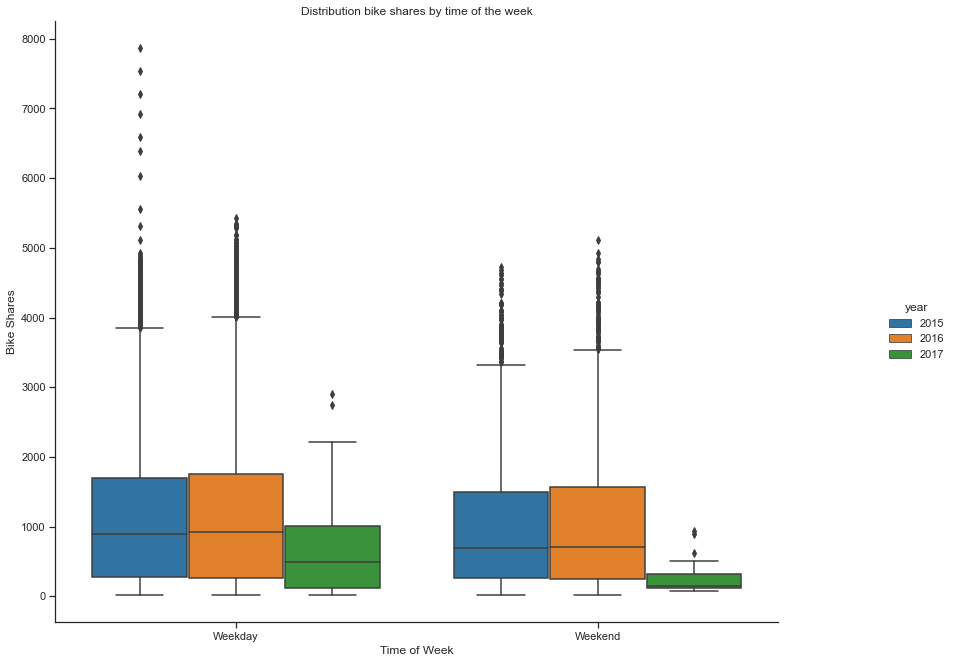

In [10]:
# Set the theme 
sns.set_theme(style = "ticks")

# Plotting New Bike Shares against time of the week(weekdays & weekends) for each year
wkday_wkend_bikeshr = sns.catplot(data = bikeshr_clean, x ="time_of_week", y = "new_bike_shares",hue = "year", palette = "tab10", kind = "box")



# Set the plot dimensions
wkday_wkend_bikeshr.fig.set_figwidth(15)
wkday_wkend_bikeshr.fig.set_figheight(10)

# Set Axis labels 
wkday_wkend_bikeshr.set(xlabel = "Time of Week", ylabel = "Bike Shares", title = "Distribution bike shares by time of the week")

plt.show()

From the visualization above, it can be observed that the weekdays of the year 2016 had the highest number of bike shares, with a median bike share of approximately 10,000. The weekends of 2017 on the other hand had the least number of bike shares. This could be as a result of the unavailability of sufficient data at the time of this analysis. It can be seen that majority of the weekday and weekend bike shares for all years fall in the range of 0 to 4000 with the exception of a number of outliers. 

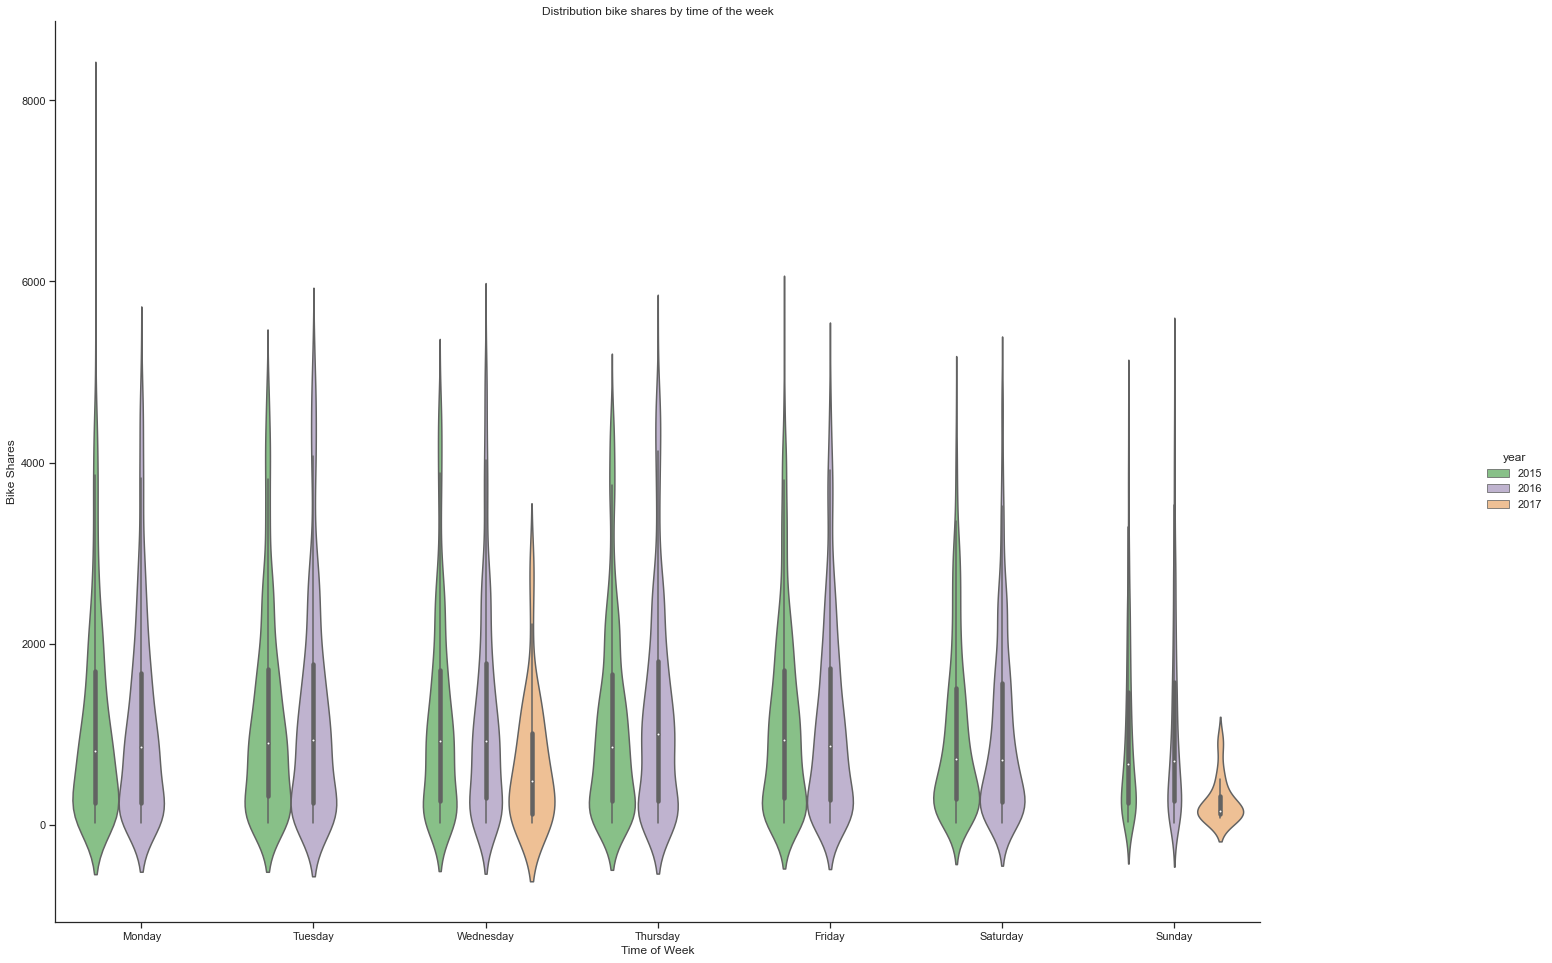

In [11]:
# Set the theme 
sns.set_theme(style = "ticks")

# Plotting New Bike Shares against time of the week(weekdays & weekends) for each year
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_bikeshr = sns.catplot(data = bikeshr_clean, x ="day_of_the_week", y = "new_bike_shares",hue = "year", palette = "Accent", kind = "violin", order =days)



# Set the plot dimensions
daily_bikeshr.fig.set_figwidth(25)
daily_bikeshr.fig.set_figheight(15)

# Set Axis labels 
daily_bikeshr.set(xlabel = "Time of Week", ylabel = "Bike Shares", title = "Distribution bike shares by time of the week")

plt.show()

The graph above show a trend where in 2015, Monday had a very high number of bike shares compared to other days of the week with sunday having the least bike shares. As with other graphs it can be oserved that 2017 had little or no bike share instances for all the days of the week in comparison to the bike shares spread of 2015 and 2016. this 

###  Investigating the effect of feels like temperature on the number of bike shares

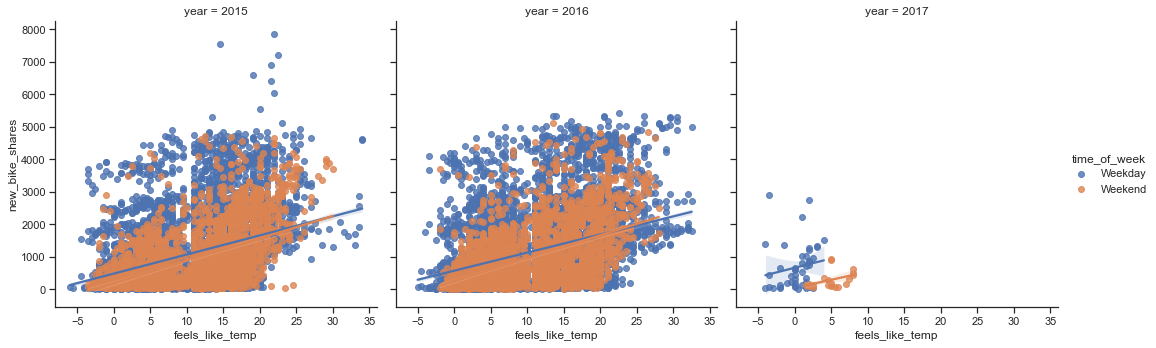

In [12]:
# Plotting New Bike Shares against feels like temperature
sns.lmplot(data = bikeshr_clean, x ="feels_like_temp", y ="new_bike_shares", hue = "time_of_week", col = "year");

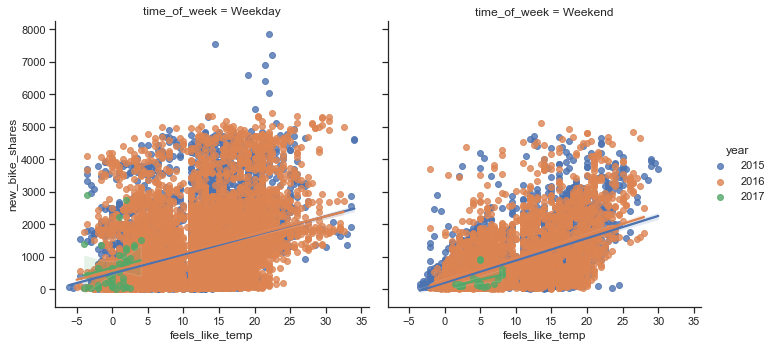

In [13]:
sns.lmplot(data = bikeshr_clean, x ="feels_like_temp", y ="new_bike_shares", hue = "year", col = "time_of_week");

In the visaulization above the seaborn lmplot function was used to investigate the feel_like_temp and the new_bike_shares variables by year and by time of week. From the visaulization it can be observed that there is a weak positive correlation in both instances between the two variables(feels_like_temperature and new_bike_share).

### Testing the hypothesis that "feels like temperature has an effect on the number of bike shares.

In [14]:
# Calculating correlation coefficient and p value for all bike share
corr, p = stats.pearsonr(bikeshr_clean.new_bike_shares, bikeshr_clean.feels_like_temp)

wkday = bikeshr_clean["time_of_week"] == "Weekday"
wkend = bikeshr_clean["time_of_week"] == "Weekend"

# Calculating the correlation coefficient and P value for bike shares over the weekdays
wkday_corr, wkday_p = stats.pearsonr(bikeshr_clean.new_bike_shares[wkday], bikeshr_clean.feels_like_temp[wkday])

# Calculating the correlation coefficient and P value for bike shares over the weekends
wkend_corr, wkend_p = stats.pearsonr(bikeshr_clean.new_bike_shares[wkend], bikeshr_clean.feels_like_temp[wkend])

invtgtn = pd.DataFrame(data = {"Correlation Coefficient":[round(corr, 4), round(wkday_corr, 4), round(wkend_corr,4)], "P_value": [p, wkday_p, wkend_p]}, index =["Days", "Weekday", "Weekend"])
print(invtgtn)

         Correlation Coefficient        P_value
Days                      0.3677   0.000000e+00
Weekday                   0.3358   0.000000e+00
Weekend                   0.4662  1.039544e-265


To gain insight on the relationship between the bike shares and feels like temperature the pearsons correlation coefficeint and the Probabillity value  was calculated for the two variables. Results from the investigation carried out gave a correlation coefficeint of 0.3677, indicating that there is weak positive correlation between new_bike_shares and feels_like_temperatue. Futhermore weekend bike ride and weekday bike rides investigations gave a correlation coefficeint of 0.4662 and 0.3358 respectively, indicating that there are more bike shares during the weekend than on week days.  

# Processs Developement Report

### Data Cleaning and Pre-Processing

To complete this data analysis project a number of python libraries were imported such as: 
* Pandas
* os
* Matplotlib
* Seaborn
* Numpy
* Scipy
* Datetime

The csv file provided was read into memory, and the two dataset were merged on the timestamp using the "merge()" method. The "info()" method was applied to accertain the number of entries, total number of fields, and the datatypes. The dataset cleaning process commenced by firstly checking the dataset for null values us the "isnull()" method, then I proceeded to delete rows were the new_bike_shares is less than 20 using the "drop()" method based on the requirements. For the data pre-processing, it was noticed that the "timestamp" field was of the datatype "object", hence it was converted to the datetime format to make it easier to work with. Afterwards, the timestamp feild was split into different components(Year, Month, Days, Time of Week).

### Visualizations

######  Plot 1:

The seaborn library was imported for the plotting. Graphs plotted in this project include the bar graph, box plot, scatter plot,and the violin plot.To investigate the distribution of bike shares by the time of day, the average "new_bike_shares" was plotted against the "timestamp" using the Seaborn library, which produced a visualization in the form of a clustered bar chart of the distribution of bikeshares for every hour of the day for the years 2015, 2016, 2017 respectivley.

###### Plot 2:

To investigate the distribution of bike share by time of the week, the Seaborn library was used to plot the average "new_bike_shares" against the "time_of_week" which produced a Box Plot for the distribution of bikeshares for weekdays and weekends.

###### Plot 3:

Investigating the distribution of bike shares by the day of the week, again the Seaborn library was used plot the average "new_bike_shares" against the "day_of_the_week", which produced a visualization in the form of a violin plot.

###### Plot 4:

To investigate futher into the relationship between new_bike_shares and fells_like_temp ,the lmplot functon of seaborn was used to determinie and understand the relationship that exist between the two variables.

### Hypothesis testing

For the hypothesis testing the Scipy libray was used to for calculating the correlation coefficeints and the Probability Values. The pearsons coefficient of correlation and the corresponding P value was generated using the stat function.

## Conclusion

 The Null Hypothesis $(h0:r = 0)$ is that there is no correlation between feels_like_temperature and new_bike_shares. The Alternative hypothesis $(h1: r≠0)$ for this project is that there is a correlation between feels like temperature and bike shares. The results above return a p value of 0.0, and a correlation of 0.36774 between feels_like_temp and new bike shares which indicates that ther is a weak positive correlation between the two variables. With this result, the null hypothesis can be confidently rejected.